<a href="https://colab.research.google.com/github/IonaSantana/Artificial-Intelligence/blob/main/Projects/Classicos/Titanic/Titanic_Survive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
people = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")

In [4]:
people.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
people.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
len(people)

891

In [7]:
people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
def tranforma_miss(lista,s):
  cont = 0
  for i in lista:
    cont = cont + 1
    if i == s:
      return cont
    

In [9]:
def pre_process(df):
  df = df.drop(['Cabin'],axis = 1)
  df['Sex'] = np.where(df['Sex'] == 'male', 0, 1)
  df['Embarked'] = np.where(df['Embarked']== 'S', 0, df['Embarked'])
  df['Embarked'] = np.where(df['Embarked']== 'C', 1, df['Embarked'])
  df['Embarked'] = np.where(df['Embarked']== 'Q', 2, df['Embarked'])
  df['Fare'] = df['Fare'].fillna(0)
  df['Age'] = df['Age'].fillna(0)
  df['Embarked'] = df['Embarked'].fillna(0)
  df['Fare'] = (df['Fare'] - df['Fare'].min()) / ( df['Fare'].max() - df['Fare'].min())
  df['Name'] = (df['Name'].astype(str))
  df['Name'] = df['Name'].apply(lambda s: s.split()[1])
  df['Name'] = df['Name'].apply(lambda s: tranforma_miss(df['Name'].unique(),s))  
  return df

In [10]:
people['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
people = pre_process(people)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d0d6abfd0>,
      dtype=object)

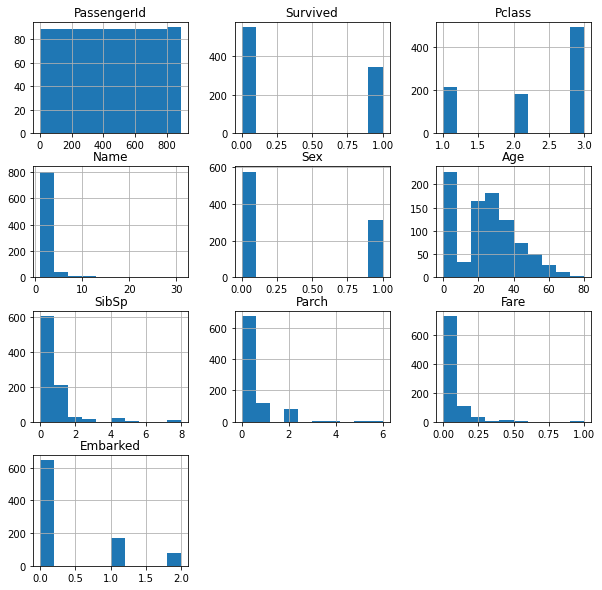

In [12]:
people.hist(figsize=[10,10])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d0d72a210>,
      dtype=object)

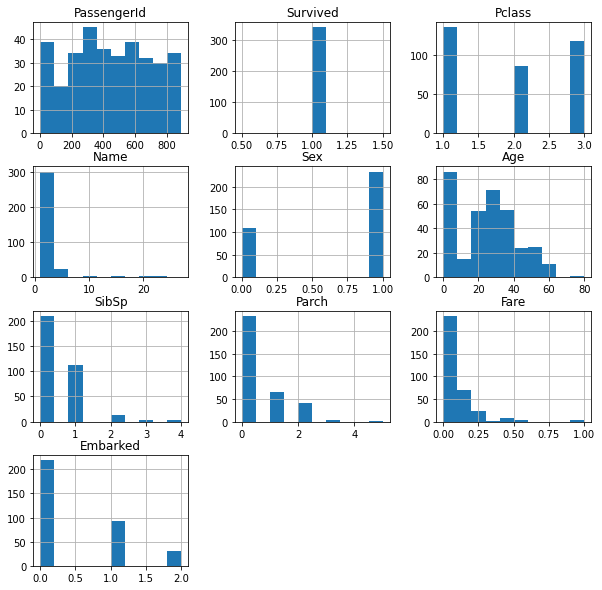

In [13]:
people_1 = people[people['Survived'] == 1]
people_1.hist(figsize=[10,10])

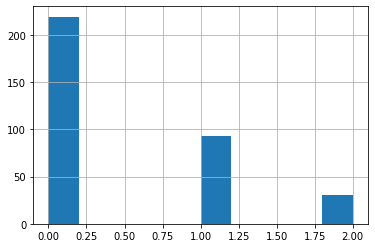

In [14]:
people_1['Embarked'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d0c6e5a90>,
      dtype=object)

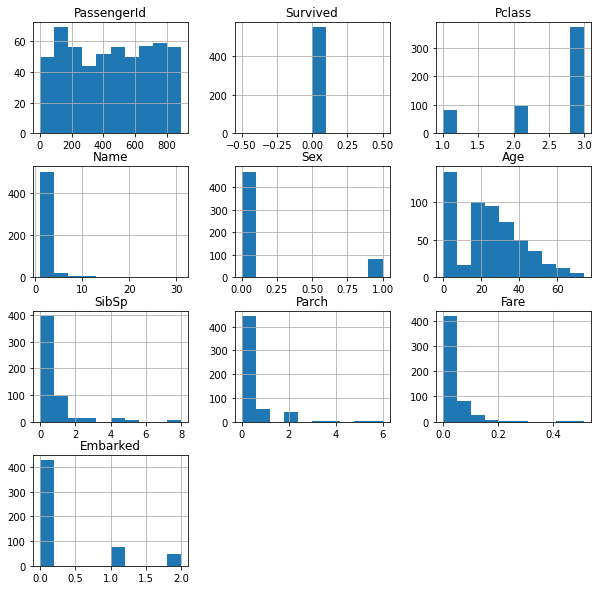

In [15]:
people_0 = people[people['Survived'] == 0]
people_0.hist(figsize=[10,10])

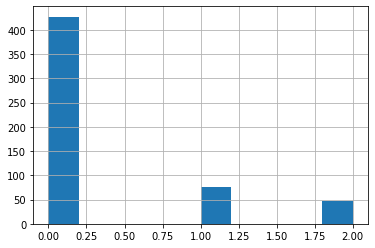

In [16]:
people_0['Embarked'].hist()

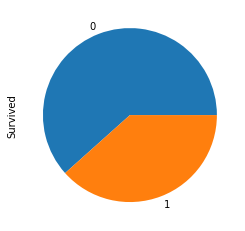

In [17]:
people['Survived'].value_counts().plot.pie()

muita gente P3 não sobreviveu, junto com SibSp perto de 0, mas tem bastante sobrevivente com 0, e sobrevivendo com 1. E sex == 0 (homens) e Parch == 0

# Separação em Train e Test

In [18]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [19]:
# X_train, X_test, y_train, y_test = train_test_split(people[['Sex', 'SibSp', 'Parch']], people['Survived'], test_size=0.2, random_state=3)

In [20]:
colunas_escolhidas = ['Pclass', 'Sex','Embarked', 'SibSp', 'Name', 'Fare']#['Pclass', 'Sex','Embarked'] #[ 'Sex', 'SibSp', 'Parch']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(people[colunas_escolhidas], people['Survived'], test_size=0.10,random_state=42)

Função saída

In [22]:
def csv(y_k, r, title):
  y_k = np.array(y_k)
  df = []
  df = pd.DataFrame(y_k, columns = ['Survived'])
  r['Survived'] = df['Survived']
  r[['PassengerId','Survived']].to_csv(title, index = False, sep = ',')


### Import test

In [23]:
resp = pd.read_csv("/content/drive/MyDrive/Titanic/test.csv")

In [24]:
resp.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [25]:
resp = pre_process(resp)

# Árvore de decisão


In [26]:
people.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=10)
clf = clf.fit(X_train,y_train)

In [28]:
y = clf.predict(X_test)

In [29]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y)) #0.77751 -> 'Pclass', 'Sex','Embarked',  e aqui 0.80

DecisionTrees's Accuracy:  0.8111111111111111


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_test))

[[44  7]
 [10 29]]


In [31]:
y_resp = resp

In [32]:
resp = resp[colunas_escolhidas] 

In [33]:
X_test_k = resp

In [34]:
y_k = clf.predict(X_test_k)

In [35]:
type(y_k)

numpy.ndarray

In [36]:
csv(y_k,y_resp, 'tree.csv')

# K Nearest Neighbor(KNN)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [38]:
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = kNN_model.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.77777778, 0.82222222, 0.78888889, 0.8       , 0.81111111,
       0.8       , 0.81111111, 0.81111111, 0.8       , 0.78888889,
       0.78888889, 0.8       , 0.78888889, 0.78888889])

In [39]:
# Building the model again, using k=1
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(n_neighbors=2)

In [40]:
knn_yhat = kNN_model.predict(X_test)
print("KNN F1-score: %.2f" % f1_score(y_test, knn_yhat, average='weighted') )

KNN F1-score: 0.81


In [41]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(knn_yhat, y_test))

[[52 14]
 [ 2 22]]


In [42]:
y_resp_knn = kNN_model.predict(resp)

In [43]:
csv(y_resp_knn,y_resp, 'knn.csv')

# Support Vector Machine

In [44]:
resp.head()

,Pclass,Sex,Embarked,SibSp,Name,Fare
0,3,0,2,0,1,0.015282
1,3,1,0,1,2,0.013663
2,2,0,2,0,1,0.018909
3,3,0,0,0,1,0.016908
4,3,1,0,1,2,0.023984


In [45]:
from sklearn import svm
SVM_model = svm.SVC(kernel = 'poly', degree=4, random_state = 42,coef0=0.15)
SVM_model.fit(X_train, y_train) 

SVC(coef0=0.15, degree=4, kernel='poly', random_state=42)

In [46]:
yhat = SVM_model.predict(X_test)

In [47]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

SVM F1-score: 0.80


In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yhat, y_test))

[[43  7]
 [11 29]]


In [49]:
yhat = SVM_model.predict(resp)

In [50]:
csv(yhat,y_resp[['PassengerId']], 'svm.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
LR_model = LogisticRegression().fit(X_train,y_train)
LR_model

LogisticRegression()

In [52]:
yhat = LR_model.predict(X_test)

In [53]:
LR_yhat_prob = LR_model.predict_proba(X_test)
print("LR F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR F1-score: 0.81
LR LogLoss: 0.42


In [54]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(yhat, y_test))

[[45  8]
 [ 9 28]]


In [55]:
yhat = LR_model.predict(resp)

In [56]:
csv(yhat,y_resp[['PassengerId']], 'logist.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Foram várias tentativas com as mesma labels com os algoritmos clássicos, próxima hipótese redes neurais

# Rede Neural

In [57]:
from sklearn.neural_network import MLPClassifier

In [58]:
network = MLPClassifier(max_iter=1000,solver='adam', hidden_layer_sizes = (10,10), warm_start=True)
network.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, warm_start=True)

In [59]:
previsoes = network.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, previsoes)

0.8222222222222222

In [61]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(previsoes, y_test))

[[44  6]
 [10 30]]


In [62]:
yhat = network.predict(resp)

In [63]:
csv(yhat,y_resp[['PassengerId']], 'rnn.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Ramdom Florest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
clf = RandomForestClassifier(max_depth=10, random_state=42, min_samples_split = 2, min_samples_leaf = 2)

In [66]:
clf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [67]:
previsoes = clf.predict(X_test)

In [68]:
clf.score(X_test,y_test)

0.8222222222222222

In [69]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(previsoes, y_test))

[[45  7]
 [ 9 29]]


In [70]:
yhat = clf.predict(resp)

In [71]:
csv(yhat,y_resp[['PassengerId']], 'random_florest.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
